In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# טוען את הדאטה
data = pd.read_csv(r"C:\Users\guymk\Downloads\data13 (1).csv")

# ממיר את העמודה של הזמן לפורמט datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# הוספת עמודת יום
data['Day'] = data['HitLocalTime'].dt.date

# בחירת העמודות הרלוונטיות: 'Day', 'Analysis' (רצף קליעות), 'Unnamed: 6' (האם הקליעה נכנסה), 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'
data_cleaned = data[['Day', 'Analysis', 'Unnamed: 6', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]

# שינוי שמות העמודות לצורך קריאה
data_cleaned.columns = ['Day', 'Make streak', 'Made', 'HitX', 'HitY', 'Arc', 'OriginX']

# המרת העמודות המספריות לפורמט נומרי והסרת שורות עם ערכים חסרים
data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']] = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']].apply(pd.to_numeric, errors='coerce')

# הסרת שורות עם ערכי NaN
data_cleaned = data_cleaned.dropna(subset=['HitX', 'HitY', 'Arc', 'OriginX'])

# בדיקה האם יש נתונים לאחר ההסרה
if data_cleaned.empty:
    print("No valid data available after cleaning.")
else:
    # הכנת הדאטה לקלסטרינג
    clustering_data = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']]

    # נורמליזציה של הדאטה
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data)

    # ביצוע קלסטרינג עם KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(clustering_data_scaled)

    # הוספת תוויות הקלסטרינג לדאטה
    data_cleaned['Cluster'] = clusters

    # הדפסת תוצאות הקלסטרינג
    print(data_cleaned.head())

    # שמירת התוצאה ל-CSV אם תרצה
    data_cleaned.to_csv('clustered_data.csv', index=False)


C:\Users\guymk\AppData\Local\Temp\ipykernel_24596\348814919.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')
C:\Users\guymk\AppData\Local\Temp\ipykernel_24596\348814919.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']] = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']].apply(pd.to_numeric, errors='coerce')
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

  Day Make streak  Made  HitX   HitY   Arc  OriginX  Cluster
1 NaT           1  2787 -48.0  102.0  56.4   -101.0        2
2 NaT           0  2975 -91.0 -134.0  52.8      4.0        2
3 NaT           1  3093 -21.0  -24.0  56.6    -68.0        2
4 NaT           2  2752  22.0  113.0  51.9    -63.0        2
5 NaT           3  2993 -88.0 -110.0  56.1    -70.0        2


C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\clust

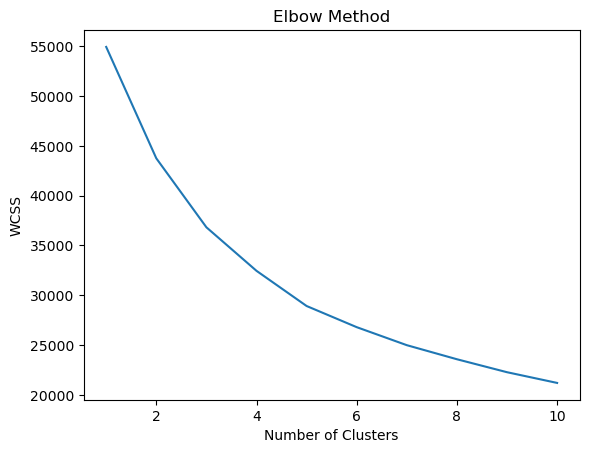

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# מחפשים את מספר הקבוצות האופטימלי בשיטת המרפק
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# ציור הגרף
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\clust

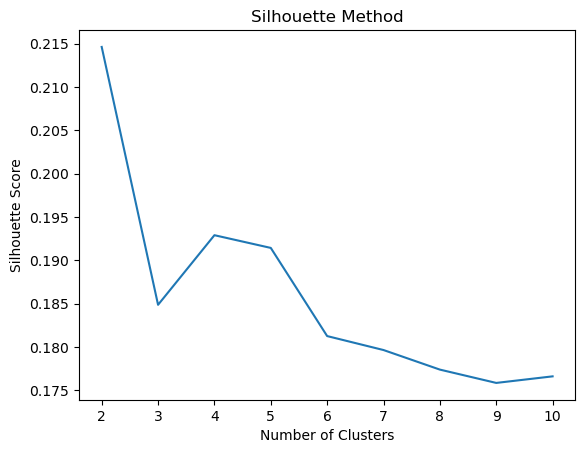

In [6]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(clustering_data_scaled)
    silhouette_scores.append(silhouette_score(clustering_data_scaled, labels))

# ציור הגרף
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# טוען את הדאטה
data = pd.read_csv(r"C:\Users\guymk\Downloads\data13 (1).csv")

# ממיר את העמודה של הזמן לפורמט datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# הוספת עמודת יום
data['Day'] = data['HitLocalTime'].dt.date

# בחירת העמודות הרלוונטיות: 'Day', 'Analysis' (רצף קליעות), 'Unnamed: 6' (האם הקליעה נכנסה), 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'
data_cleaned = data[['Day', 'Analysis', 'Unnamed: 6', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]

# שינוי שמות העמודות לצורך קריאה
data_cleaned.columns = ['Day', 'Make streak', 'Made', 'HitX', 'HitY', 'Arc', 'OriginX']

# המרת העמודות המספריות לפורמט נומרי והסרת שורות עם ערכים חסרים
data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']] = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']].apply(pd.to_numeric, errors='coerce')

# הסרת שורות עם ערכי NaN
data_cleaned = data_cleaned.dropna(subset=['HitX', 'HitY', 'Arc', 'OriginX'])

# בדיקה האם יש נתונים לאחר ההסרה
if data_cleaned.empty:
    print("No valid data available after cleaning.")
else:
    # הכנת הדאטה לקלסטרינג
    clustering_data = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']]

    # נורמליזציה של הדאטה
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data)

    # ביצוע קלסטרינג עם KMeans
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(clustering_data_scaled)

    # הוספת תוויות הקלסטרינג לדאטה
    data_cleaned['Cluster'] = clusters

    # ספירת מספר הקליעות בכל קלאסטר
    cluster_counts = data_cleaned['Cluster'].value_counts()
    print(cluster_counts)

    # שמירת התוצאה ל-CSV אם תרצה
    data_cleaned.to_csv('clustered_data.csv', index=False)


C:\Users\guymk\AppData\Local\Temp\ipykernel_24596\3685167629.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')
C:\Users\guymk\AppData\Local\Temp\ipykernel_24596\3685167629.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']] = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']].apply(pd.to_numeric, errors='coerce')
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Cluster
1    5303
0    4914
2    3515
Name: count, dtype: int64


C:\Users\guymk\AppData\Local\Temp\ipykernel_24596\625242916.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')
C:\Users\guymk\AppData\Local\Temp\ipykernel_24596\625242916.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']] = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']].apply(pd.to_numeric, errors='coerce')
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n

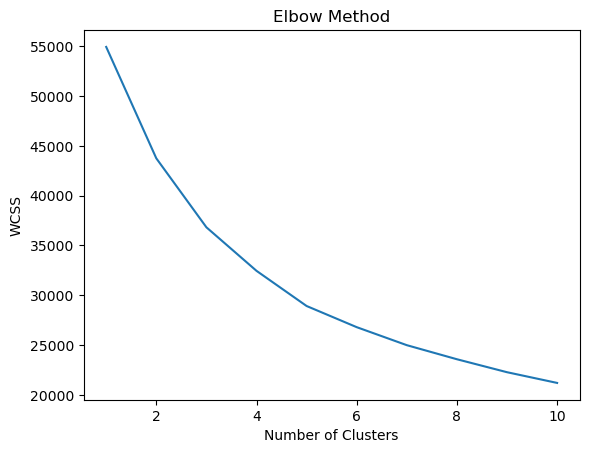

C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\clust

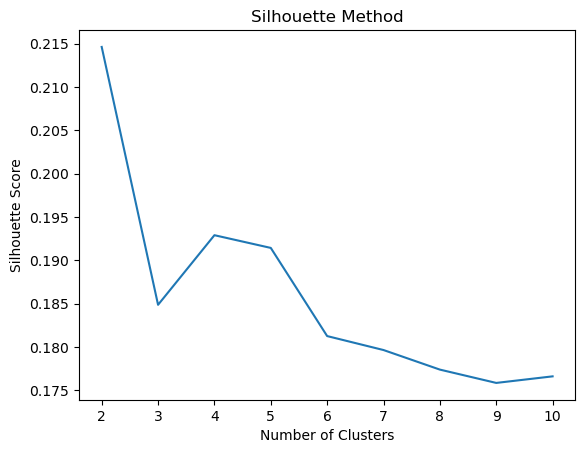

C:\Users\guymk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  Day Make streak  Made  HitX   HitY   Arc  OriginX  Cluster
1 NaT           1  2787 -48.0  102.0  56.4   -101.0        3
2 NaT           0  2975 -91.0 -134.0  52.8      4.0        3
3 NaT           1  3093 -21.0  -24.0  56.6    -68.0        3
4 NaT           2  2752  22.0  113.0  51.9    -63.0        0
5 NaT           3  2993 -88.0 -110.0  56.1    -70.0        3


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# טוען את הדאטה
data = pd.read_csv(r"C:\Users\guymk\Downloads\data13 (1).csv")

# ממיר את העמודה של הזמן לפורמט datetime
data['HitLocalTime'] = pd.to_datetime(data['Unnamed: 1'], errors='coerce')

# הוספת עמודת יום
data['Day'] = data['HitLocalTime'].dt.date

# בחירת העמודות הרלוונטיות
data_cleaned = data[['Day', 'Analysis', 'Unnamed: 6', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']]

# שינוי שמות העמודות לצורך קריאה
data_cleaned.columns = ['Day', 'Make streak', 'Made', 'HitX', 'HitY', 'Arc', 'OriginX']

# המרת העמודות המספריות לפורמט נומרי והסרת שורות עם ערכים חסרים
data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']] = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']].apply(pd.to_numeric, errors='coerce')

# הסרת שורות עם ערכי NaN
data_cleaned = data_cleaned.dropna(subset=['HitX', 'HitY', 'Arc', 'OriginX'])

# הכנת הדאטה לקלסטרינג
clustering_data = data_cleaned[['HitX', 'HitY', 'Arc', 'OriginX']]

# נורמליזציה של הדאטה
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# --- שלב 1: שיטת Elbow ---
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_data_scaled)
    wcss.append(kmeans.inertia_)

# ציור גרף Elbow
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# --- שלב 2: שיטת Silhouette ---
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(clustering_data_scaled)
    silhouette_scores.append(silhouette_score(clustering_data_scaled, labels))

# ציור גרף Silhouette
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# --- שלב 3: בחירת מספר הקלאסטרים האופטימלי ---
# לפי שיטת Elbow אפשר לבחור 4 או 5 קלאסטרים
optimal_clusters_elbow = 4

# לפי שיטת Silhouette אפשר לבחור 4 קלאסטרים (כי היה שיא נוסף שם)
optimal_clusters_silhouette = 4

# נבצע את הקלסטרינג עם מספר הקלאסטרים שנבחר
optimal_clusters = optimal_clusters_silhouette  # אפשר גם לשנות ל-optimal_clusters_elbow לפי הצורך

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(clustering_data_scaled)

# הוספת תוויות הקלסטרינג לדאטה
data_cleaned['Cluster'] = clusters

# הדפסת תוצאות הקלסטרינג
print(data_cleaned.head())

# שמירת התוצאה ל-CSV אם תרצה
data_cleaned.to_csv('clustered_data.csv', index=False)
